In [1]:
# Function for reading docx files as text 
import docx # importing the library for reading docx files as text

def readdoctext(filename):
    doc = docx.Document(filename) # this line of code reads file as paras and this needs to be converted to text
    fullText = [] # creating this to add all text from the document in a for loop
    for para in doc.paragraphs: # reading text from paras to add to full text
        txt = para.text.encode('ascii', 'ignore')
        fullText.append(txt)
    return fullText # when the function is called, it returns the full text of the docx file and assigns to the variable used

In [2]:
import PyPDF2 # python library for reading pdfs. This function does nto read OCR docs
#Function for reading pdf files as text
def readpdftext(filename):
    pdfFileObj = open(filename,'rb')     #'rb' for read binary mode
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pdfReader.numPages
    pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
    for i in range(0,pdfReader.numPages): # iterating page by page to read text
        pageObj = pdfReader.getPage(i)          
        pdffile = pdffile + pageObj.extractText()
    return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used

In [3]:
import os # used for file reading and path handling

In [4]:
# the path to your pdf file directory. Change this every time a different folder for pdfs is used. 
# Ensure to add "\\" to path in windows
myfiledir = "C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser"

In [5]:
from pathlib import Path # importing path to convert above text type path to path type

In [6]:
myfiledir =  Path(myfiledir) # path is now the final path of the pdfs

In [7]:
type(myfiledir) # Check to ensure that the output is "pathlib.WindowsPath"

pathlib.WindowsPath

In [8]:
# Importing libraries that will be used for further manipulation
import pandas as pd
import glob

In [9]:
pdffiles = glob.glob(os.path.join(myfiledir, '*.pdf')) # identify the list of all pdf documents

In [10]:
docfiles = glob.glob(os.path.join(myfiledir, '*.docx')) # identify the list of all docx documents

In [11]:
all_files = pdffiles + docfiles # identify the list of all pdf and docx 

In [12]:
type(all_files) # check to ensure that the all files list is list type in python

list

In [13]:
all_files # checking the list of all files

['C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\STRATH-TR-85-001.pdf']

In [14]:
import os.path

In [15]:
# Demonstration of the use of splitext method since this will be used later
file_ext = os.path.splitext("Zukhrufany_Stiffi.pdf")
file_ext[1]

'.pdf'

In [15]:
data = {} # creating a dictionary which will have the file names as keys and content as value
# Dictionaries are key:value pairs and the value can be accessed using the key 
for file in all_files: 
    if os.path.splitext(file)[1] == '.pdf':
        data.update({os.path.splitext(file)[0]: readpdftext(file)})
    elif os.path.splitext(file)[1] == ".docx":
        data.update({os.path.splitext(file)[0]: readdoctext(file)})

PdfReadError: Unsupported PNG filter 4

In [17]:
# Checking to see that the data is read and how it looks. The keys are full path rather than name of file
print(data)

{'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\ET0153-15-BD-0001': 'Canadian Natural subsea 7 ;»?>*-« Ł J < < v v# * Łi ;V \'If . Ł. i, ^ T < \'ijfc .7 y>» y * - ~r Ł Ł"*, \' iV \' v. Ł i }Ł\' \'H. §| " %£ % jjpl \\%0\'::; * 4*-- nr Ł»" r" Ł" jf-g&f": ,r -Ł Vi-i -\'Ł \'/. 4 - -i. t ta!$f - - \' Ł)\'Ł f ; Viy.* \'S(j \'Ł ! \'Ł IP \' "sHLr-Its Milps -.1T5? r«T .J Ł> ŠTV\' 92J3|jl r W ^!lg; :->r. Ł V f MB J j Ł s|gJ \' i \' . " iA. ~ Ł , -L H k 1 ri m \'. i\'k- - v-I ^ -Sir f ft ff\' fi ! .K. " , .... 4 \' f . j»J 0:t !* Jfr \' i Ł $> IP \' "sHLr-Ł -ŁŁŁ ui -A \'Ł 1 ££i \'\'2* Ł* " vi ;. 1 i ;:vy:\' & | ? -.i r4|\'" - . \'<h ;: .**« rl/rA. ,4 " TT 4 .4j J* Ł"\' | ? -.i r4|\'" - . CNR PL70 PIPELINE REPLACEMENT Contract No. ET0153 .. } C1 29.12.2003 Issued for Construction ""TJP AHM , }me\\ A1 23.10.2003 Issued for IDC WG AHM REVISION DATE DESCRIPTION ORIGINATOR CHECKED APPROVED CLIENT APPR Document Title: Design Premise Document No: ET0153-15

In [33]:
import os
keys = data.keys()
data2 = ''
for k in keys:
    text = str(k) + str(data[k].encode('utf-8'))
    data2 = data2 + text
nextfile = 'Document.docx'
with open(nextfile,'w')as f:
    f.write(str(data2))
    pass 



In [39]:
from docx import Document
from docx.shared import Inches
document = Document()
document.add_paragraph(data2)
document.save('Document.docx')

In [22]:
import csv

with open('mycsvfile.csv', 'w') as f:  # Just use 'w' mode in 3.x
    w = csv.DictWriter(f, data.keys())
    w.writeheader()
    w.writerow(data)

In [23]:
df = pd.read_csv("mycsvfile.csv")
df.head()

,C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Pages from Upshur County Tax Delinquent
0,Account Number/ OwnerLegal DescriptionBalance ...


In [17]:
# Checking the access to specific value using the key
data['C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\36-P-251304-EIA - Ninian Manifold Materials Spec']

''

In [19]:
# Make a copy of the dictionary to avoid replacing the original data
data2 = data.copy()

In [20]:
# using the copied dictionary, we are replacing the path with just file name
for key, value in list(data2.items()):
    k = key
    m = key.split("\\")[-1]
    data2[m] = data2.pop(key)

In [21]:
# Checking to confirm that the replacement of keys has worked
data2.keys()

dict_keys(['Accenture-Digitizing-Energy-Analytics-Powered-Performance', 'AT-03430-WP-Beyond Digitalization', 'Data_Science_from_Scratch_First_Princ', 'digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance', 'L-400238-S00-REPT-001 Consolidated Inspection Report', 'paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1', 'Statistical Analyses of Historical Pipeline Incident Data with Ap', 'Zukhrufany_Stiffi', 'A-302594-S00-PROP-001-A01', 'A-302594-S00-PROP-001-A01_VS', 'A-302594-S00-PROP-002-A01'])

In [22]:
# Sample to show that some files are not read (likely OCR docs or special image included in front pages)
data2["Data_Science_from_Scratch_First_Princ"]

''

In [23]:
# Sample to show that other files are read
data2["Zukhrufany_Stiffi"]

' \n \n \n \n \n \n \n \n \n \nFaculty of Science and Technology\n \n\n \nStudy program/ Specialization:\n \nRisk Management/ Risk Management\n \nS\npring semest\ner, 2018\n \n \nOpen / Restricted access\n \nWriter\n:\n \nStiffi Zukhrufany\n \n\n \n\n \nFaculty supervisor\n:\n \nProf. \nEirik.B. Abrahamsen\n \nExternal supervisor\n:\n \n-\n \nTitle of thesis\n:\n \nThe Utilization of Supervised Machine Learning in Predicting \nCorrosion to Support \nPreventing Pipelines Leakage in Oil and Gas Industry\n \nCredit (ECTS): 30 ECTS\n \n \n \nPages              : 53\n \n+ enclosure     : 8\n \nStavanger, 15\nth\n \nJune 2018\n \nKeywords:\n \n-\n \nOil and Gas Pipelines\n \n-\n \nCorrosion\n \n-\n \nSupervised Machine Learning\n \n-\n \nDecision\n-\nm\naking\n \ni\n \n \nAbstract\n \n \n \nPipelines ha\nve\n \nbecome indispensable i\nn\n \noil and gas industry to support transportation of \nflammable \nand poisonous fluids such as \ncrude oil, natural gas\n,\n \nand refined petroleum produc

In [24]:
# Making a copy of the modified dictionary to in the next step remove those docs that were not read
data3 = data2.copy()

In [25]:
unread = [] # empty list at the moment. This will contain the list of unread documents 

for key, value in list(data3.items()):
    if data3[key] == '':
        unread.append(key)
        del data3[key]

In [26]:
# Checking to see that the unread file is removed
data3.keys()

dict_keys(['Accenture-Digitizing-Energy-Analytics-Powered-Performance', 'AT-03430-WP-Beyond Digitalization', 'digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance', 'L-400238-S00-REPT-001 Consolidated Inspection Report', 'paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1', 'Statistical Analyses of Historical Pipeline Incident Data with Ap', 'Zukhrufany_Stiffi', 'A-302594-S00-PROP-001-A01', 'A-302594-S00-PROP-001-A01_VS', 'A-302594-S00-PROP-002-A01'])

In [27]:
# Checking to see that the number remaining in latest data file
len(data3)

10

In [28]:
# Checking the contents of unread files list
unread

['Data_Science_from_Scratch_First_Princ']

In [29]:
# Checking to confirm that the numer of docs remaining and number of docs unread add up to total number of docs
len(data2) == len(data3) + len(unread)

True

The data is now read and ready for manipulation. Note that the 3rd data file (data3) is the file that contains all the text documents extracted from pdfs and docx files. The next steps would be to 
- remove any punctuations
- remove numbers (since when we start searching whether a specific word is in the document, don't need numbers)
- remove english stop words (words like is, an , the that etc.)
- Create a word cloud

In [30]:
import re
# Remove puntuation
for key, value in data3.items():
    data3[key] = re.sub(r'[-./?!,":;()\']',' ',str(data3[key]))
    data3[key] = data3[key].lower()

In [31]:
data3['Zukhrufany_Stiffi']

' \n \n \n \n \n \n \n \n \n \nfaculty of science and technology\n \n\n \nstudy program  specialization \n \nrisk management  risk management\n \ns\npring semest\ner  2018\n \n \nopen   restricted access\n \nwriter\n \n \nstiffi zukhrufany\n \n\n \n\n \nfaculty supervisor\n \n \nprof  \neirik b  abrahamsen\n \nexternal supervisor\n \n \n \n \ntitle of thesis\n \n \nthe utilization of supervised machine learning in predicting \ncorrosion to support \npreventing pipelines leakage in oil and gas industry\n \ncredit  ects   30 ects\n \n \n \npages                53\n \n+ enclosure       8\n \nstavanger  15\nth\n \njune 2018\n \nkeywords \n \n \n \noil and gas pipelines\n \n \n \ncorrosion\n \n \n \nsupervised machine learning\n \n \n \ndecision\n \nm\naking\n \ni\n \n \nabstract\n \n \n \npipelines ha\nve\n \nbecome indispensable i\nn\n \noil and gas industry to support transportation of \nflammable \nand poisonous fluids such as \ncrude oil  natural gas\n \n \nand refined petroleum produc

In [32]:
# Remove numbers
for key, value in data3.items():
    data3[key] = re.sub('[-|0-9]',' ',str(data3[key]))

In [38]:
# Import the key packahe in python that is used for natural language processing
import nltk

In [39]:
# For removing the stop words would first require the text files to be "tokenised" 
# which is to make python read words as words rather than as a chunk of text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [35]:
# For downloading the stop words and other corpus support tools like punk
nltk.download_gui()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [40]:
# assigning the stop words from english language to a variable
stop_words = set(stopwords.words('english'))

In [37]:
# RegexpTokenizer will help us remove the puntuation that was not already removed (like the \\ that were left)
from nltk.tokenize import RegexpTokenizer
#Firstly we will need to make python read the blob of text as sentence and this tokenizer will help with that
from nltk.tokenize import sent_tokenize
for key, value in list(data3.items()):
    tokenized_sent = sent_tokenize(str(data3[key]))
    tokenizer = RegexpTokenizer(r'\w+')
    tokenized_word = tokenizer.tokenize(str(tokenized_sent))
    data3[key] = tokenized_word # This is all the words in each of the docs listed 

In [38]:
for key, value in list(data3.items()): # This loop removes all the stop words in the word lists
    filtered_words = [] 
    for w in data3[key]: 
        if w not in stop_words: 
            filtered_words.append(w)
    data3[key] = filtered_words 

In [39]:
# This package allows easy generation of word clouds that will help us 
# identify the topics that are most prominent in each of the files
from wordcloud import WordCloud

In [40]:
# This library is needed for plotting the word cloud and then saving it as a file
import matplotlib.pyplot as plt

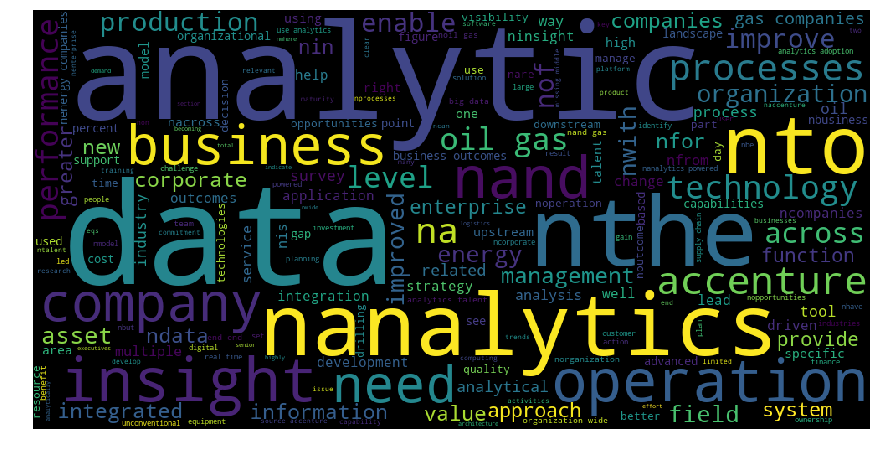

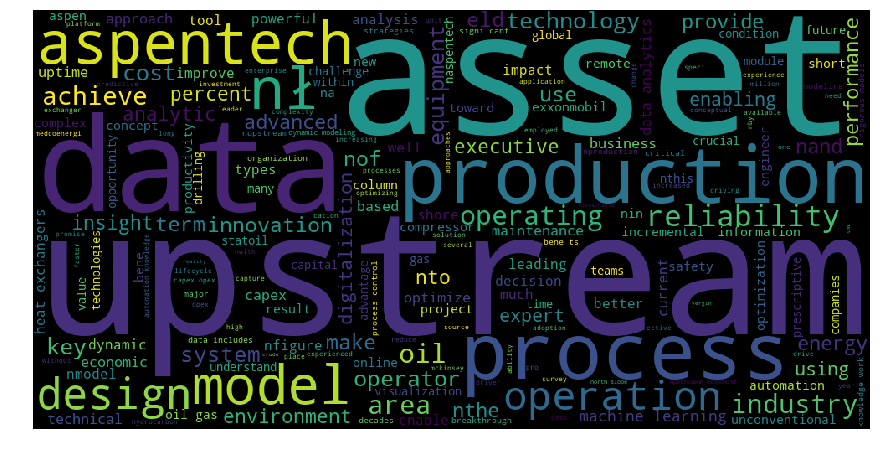

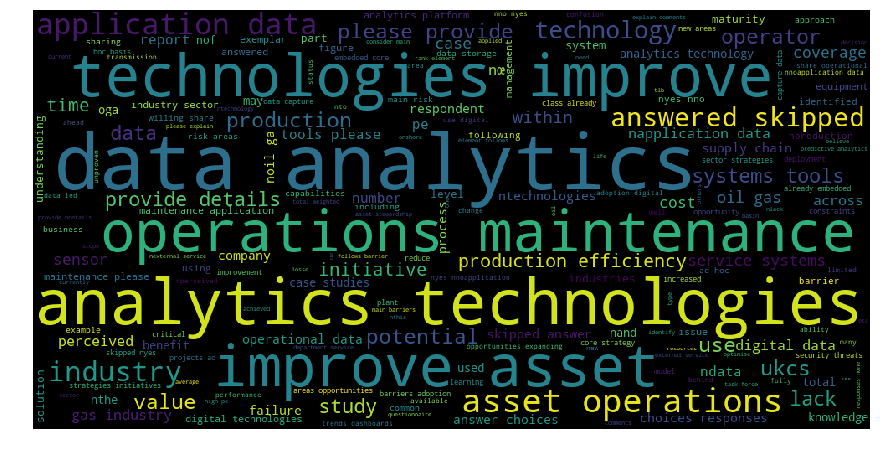

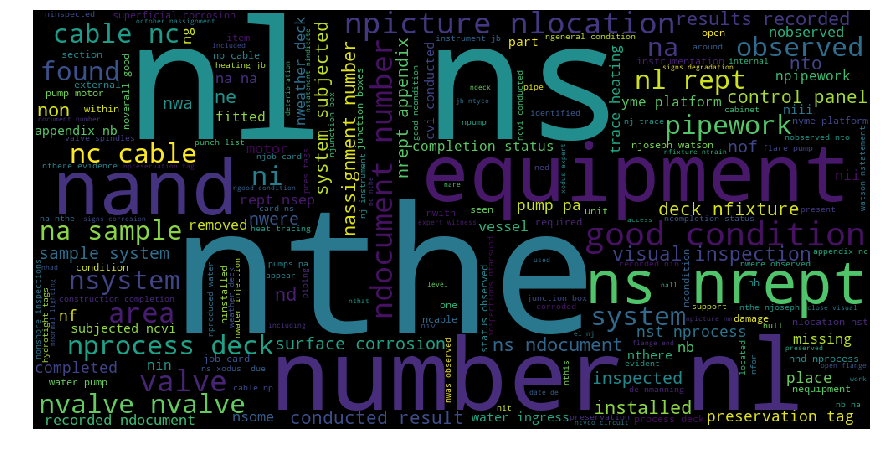

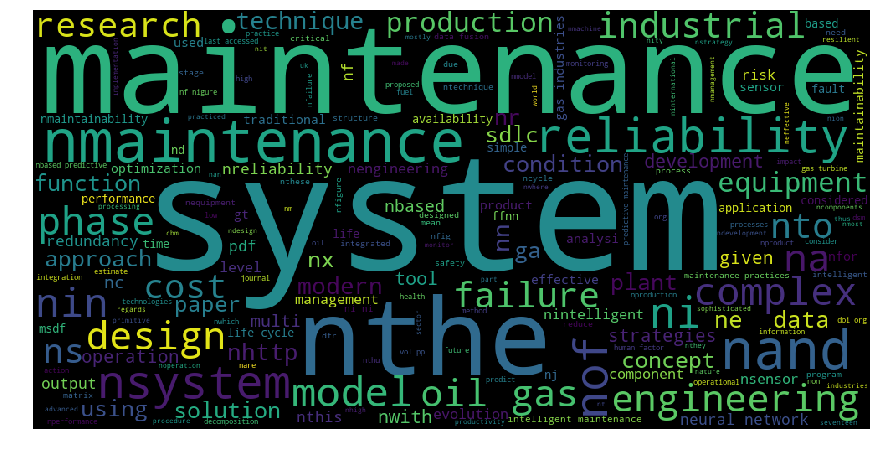

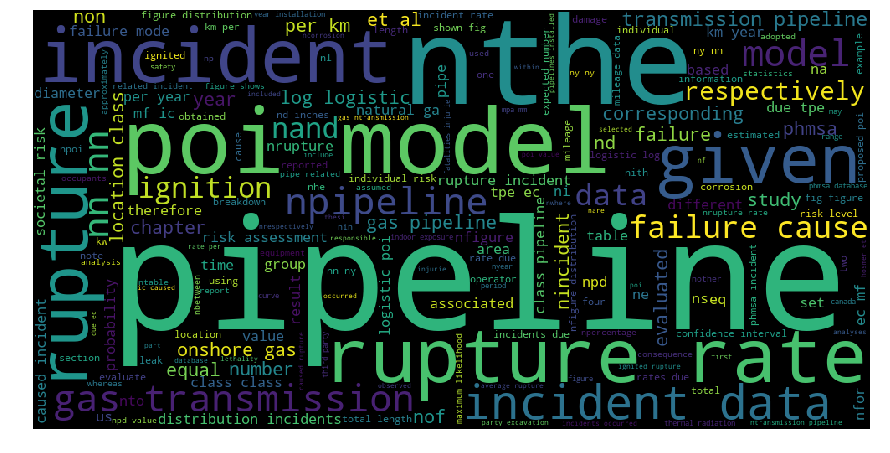

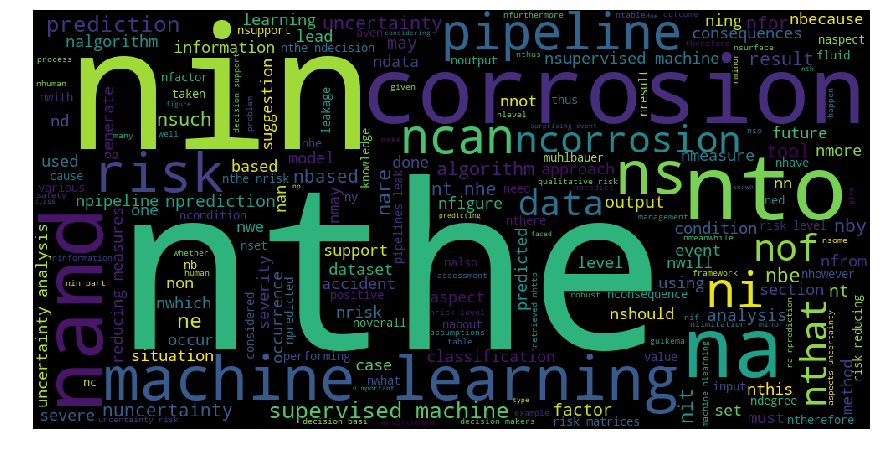

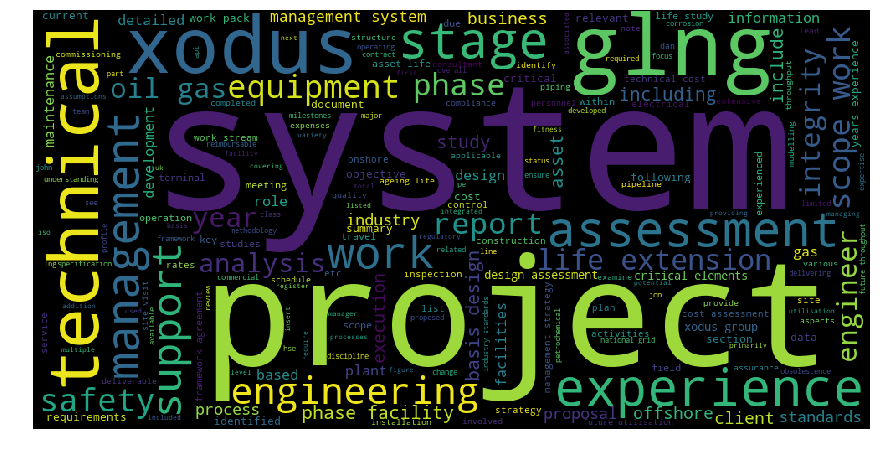

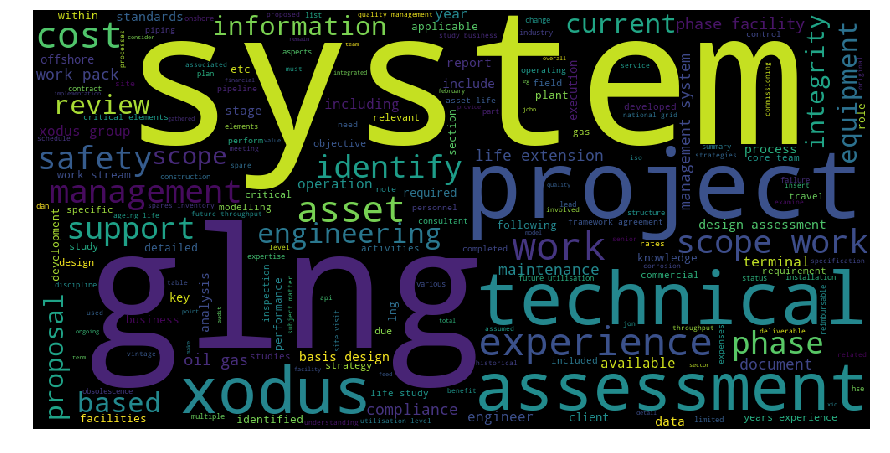

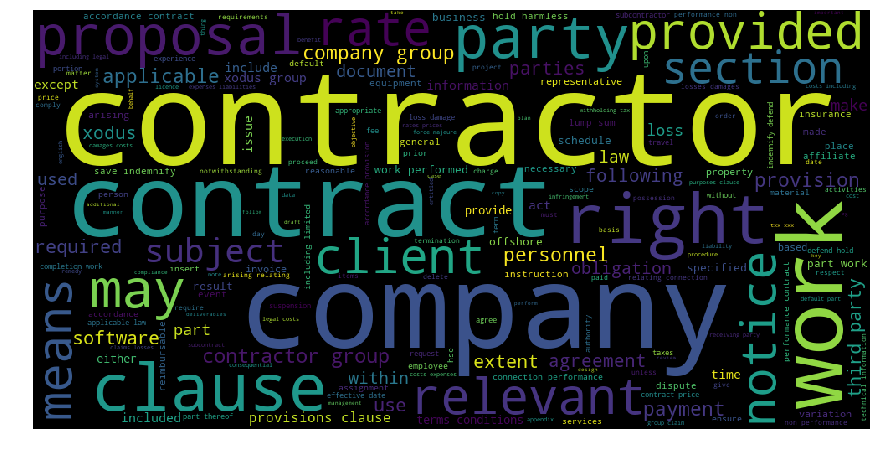

In [41]:
# Let us start plotting the word clouds for all the files
for key, value in list(data3.items()): # Loop through the data and save each word cloud by the file name
    wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data3[key]))
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    name = str(key) + ".jpeg"
    plt.savefig(name)

In [42]:
# 
from nltk.stem.porter import *
import numpy as np
import collections

In [43]:
data4 = data3.copy()

In [44]:
for key, value in list(data4.items()):
    count = collections.Counter(data4[key])
    data4[key] = count

In [1]:
data4["A-302594-S00-PROP-002-A01"]["proposal"]

NameError: name 'data4' is not defined

Now data4 can be used to look for the words that are needed if the word clouds do not make things clear. 

In [259]:
'''from nltk.stem.porter import *
import numpy as np
import collections

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer = PorterStemmer()
stemmed = stem_tokens(data3["A-302594-S00-PROP-002-A01"], stemmer)
count = collections.Counter(stemmed)
print(count)'''

'from nltk.stem.porter import *\nimport numpy as np\nimport collections\n\ndef stem_tokens(tokens, stemmer):\n    stemmed = []\n    for item in tokens:\n        stemmed.append(stemmer.stem(item))\n    return stemmed\n\nstemmer = PorterStemmer()\nstemmed = stem_tokens(data3["A-302594-S00-PROP-002-A01"], stemmer)\ncount = collections.Counter(stemmed)\nprint(count)'

In [40]:
filepath  = "C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\L-400238-S00-REPT-001 Consolidated Inspection Report.pdf"

In [4]:
import os

In [5]:
head, tail = os.path.split(filepath)

In [10]:
dot = tail.find(".", len(tail)-6)

In [11]:
os.path.splitext(filepath)[1]

'.pdf'

In [13]:
def read_file(filepath):
    ext = os.path.splitext(filepath)[1]
    data = None
    

    if ext == ".xlsx":
        print("excel file reading into dataframe...")
        data = pd.read_excel(filepath)
        print("file read. File type: ", type(data))
    elif ext == ".csv":
        print("csv file reading into dataframe...")
        data = pd.read_csv(filepath)
        print("file read. File type: ", type(data))
    elif ext == ".pdf":
        print("pdf file reading. This will take a few minutes...")
        import PyPDF2 
        pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pdfReader.numPages
        pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
        for i in range(0,pdfReader.numPages): # iterating page by page to read text
            pageObj = pdfReader.getPage(i)          
            pdffile = pdffile + pageObj.extractText()
        data = pdffile
        print("file read. File type: ", type(data))
    elif ext == ".docx":
        import dox

        doc = docx.Document(filepath)
        fullText = []
        for para in doc.paragraphs:
            txt = para.text.encode("ascii", "ignore")
            fullText.append(txt)
        data = fullText
        print("file read. File type: ", type(data))
    elif ext == ".xls":
        print("reading an old excel file into dataframe.")
        import xlrd
        wb = xlrd.open_workbook(filepath)
        sheet_names = wb.sheet_names()
        sheet = wb.sheet_by_name(sheet_names[0])
        d = [[sheet.cell_value(r, c) for c in range(sheet.ncols)] for r in range(sheet.nrows)]
        data = pd.DataFrame(d)
        print("file read. File type: ", type(data))
    else:
        print("Dont Recognise the file format. I only read xls, xlsx, csv, pdf and docx files", ext)
    return data

In [14]:
import pandas as pd
import numpy as np 
import os

In [15]:
d = read_file("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\01. Actions\\Advisory Support\\Daily Report Data\\2017-11-12 SSE Weekly Production Report.xls")

reading an old excel file into dataframe.
file read. File type:  <class 'pandas.core.frame.DataFrame'>


In [20]:
import pandas as pd

In [17]:
import reader

In [19]:
d = reader.read_file("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\01. Actions\\Advisory Support\\Daily Report Data\\2017-11-12 SSE Weekly Production Report.xls")

reading an old excel file into dataframe.
file read. File type:  <class 'pandas.core.frame.DataFrame'>


In [20]:
type(d)

pandas.core.frame.DataFrame

In [80]:
import PyPDF2
import pandas as pd 
import numpy as np 
import os
import glob

def readpdftext(filepath):
    print("reading pdf as text file....")
    pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pdfReader.numPages
    pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
    for i in range(0,pdfReader.numPages): # iterating page by page to read text
        pageObj = pdfReader.getPage(i)          
        pdffile = pdffile + pageObj.extractText()
    print("file ready. file format: ", type(pdffile))
    return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used



def readpdffiles(filespath):
    myfiledir = Path(filespath)
    pdffiles =  glob.glob(os.path.join(myfiledir, '*.pdf')) # identify the list of all pdf documents
    print("reading %x pdf files from the given path...", len(pdffiles))
    data = {} # creating a dictionary which will have the file names as keys and content as value
    # Dictionaries are key:value pairs and the value can be accessed using the key 
    for file in all_files: 
        data.update({os.path.splitext(file)[0]: readpdftext(file)})
    print("All pdf files read into a dictionary with file path and text")
    return data

def writepdfs_to_docx(data):
    keys = data.keys()
    data2 = ''
    for k in keys:
        text = str(k) + str(data[k].encode('utf-8'))
        data2 = data2 + text
    from docx import Document
    from docx.shared import Inches
    document = Document()
    document.add_paragraph(data2)
    document.save('Document.docx')
    print("Pdf files written to docx")

def singlepdf_to_docx(data):
    from docx import Document
    from docx.shared import Inches
    document = Document()
    document.add_paragraph(data)
    document.save('Document.docx')
    print("Pdf file written to docx")

def table_from_pdf_page(filepath):
    print("Trying to read all tables from the pdf file....")
    import tabula
    df = []
    with open(filepath, mode = "rb") as f:
        reader = PyPDF2.PdfFileReader(f)
        n = reader.getNumPages()
    for i in range(0,n+1):
        df.append(tabula.read_pdf(filepath, multiple_tables = True, pages = i))
    data = []
    pages = []
    for i in range(0,len(df)):
        if len(df[i]) != 0:
            data.append(df[i])
            pages.append(i)

    print("Number of tables read in pdf file: ", len(data))
    print("Number of pages in which tables were read: ", len(pages))
    return data, pages

def wordcloud_single_pdf(filepath):
    data = readpdftext(filepath)
    import nltk
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    from nltk.tokenize import RegexpTokenizer
    from nltk.tokenize import sent_tokenize
    import string
    from nltk.stem.porter import PorterStemmer
    
    stop_words = set(stopwords.words("english"))

    data = d.translate(str.maketrans('', '', string.punctuation))
    data = data.replace("\n", " ")
    data = data.lower()
    tokenized_sent = sent_tokenize(str(data))
    tokenizer = RegexpTokenizer('\n', gaps=True)
    tokenized_word = tokenizer.tokenize(str(tokenized_sent))
    stemmer = PorterStemmer()
    tokens_stemmed = [stemmer.stem(x) for x in tokenized_word]


    filtered_words = []
    for w in tokens_stemmed:
        if w not in stop_words:
            filtered_words.append(w)
        
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt

    wordcloud = WordCloud(width = 1000, height = 500).generate(" ".join(filtered_words))
    plt.figure(figsize = (15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    head, tail = os.path.split(filepath)
    name = tail.replace(".pdf", "") + ".jpg"
    plt.savefig(name)

    print("Word Cloud Saved")

In [54]:
d = readpdftext("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

reading pdf as text file....
file ready. file format:  <class 'str'>


In [69]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
import string

stop_words = set(stopwords.words("english"))

data = d.translate(str.maketrans('', '', string.punctuation))
data = data.replace("\n", " ")
data = data.lower()
tokenized_sent = sent_tokenize(str(data))
tokenizer = RegexpTokenizer('\n', gaps=True)
tokenized_word = tokenizer.tokenize(str(tokenized_sent))


filtered_words = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_words.append(w)
print(filtered_words)

["['the upstream exploration and production industry has responded to the new reality of oil and gas  economics through initiatives intended to achieve sustainable pro˜ts at any commodity pricing a   key driver is the use of advanced technology to change the pro˜t equation driving down the break  even cost of producing crude oil and natural gas by up to 30œ40 percent this trend was highlighted by daniel yergin of ihs cambridge energy research associates in his  keynote remarks at ceraweek 2017 1 he emphasized the singleminded focus of oil industry  executives on driving down production costs a key initiative showing initial success has been the   journey towards the digitalization of the oil asset at yergin™s ceraweek a special technology vision showcase called ﬁagoraﬂ was introduced to  expose executives to the leading innovations in this area the vision is that increasing the amount   of data collected and the ability to make decisions based on that data from anywhere will improve   

In [35]:
d,p = table_from_pdf_page("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

Trying to read all tables from the pdf file....
Number of tables read in pdf file:  1
Number of pages in which tables were read:  1


In [37]:
d

[[                  0          1       2               3    4            5   6  \
  0  driving customer  LIFECYCLE  or iok  n MAINTENANCEP  EsN  GINEERING P NaN   
  
      7              8             9  10                              11  
  0 NaN  MANUFACTURING  SUPPLY CHAIN NaN  Value Framework Tying Business  ,
                            0                       1     2            3    4  \
  0                       NaN                       a   NaN          NaN  NaN   
  1     Improve Reliability &                     dii  nn g          NaN  g a   
  2     Operational Integrity  De Improvement Areasma    De  c is io n S  NaN   
  3   Reduce Production Costs                 M a ain    nd    M a n gem  NaN   
  4            Improve Safety                     NaN  tena            n  NaN   
  5                       NaN                    A es   NaN         c St  NaN   
  6     Improve Environmental                     set    aH            r  teg   
  7                Compliance     

reading pdf as text file....
file ready. file format:  <class 'str'>
Word Cloud Saved


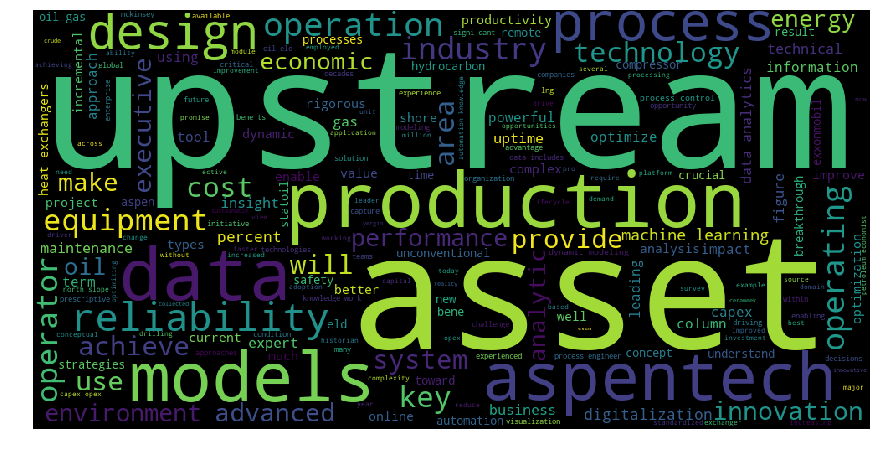

In [81]:
wordcloud_single_pdf("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

In [1]:
import pdfhandler

In [ ]:
pdfhandler.wordcloud_single_pdf("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

In [13]:
d = pdfhandler.readpdffiles("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder")

reading %x pdf files from the given path... 10
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....


file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
reading pdf as text file....
file ready. file format:  <class 'str'>
All pdf files read into a dictionary with file path and text


In [14]:
dat_count = {}
import os
from pathlib import Path
for k in range(len(d.keys())):
    d[list(d.keys())[k]] = d[list(d.keys())[k]].lower()
    words = d[list(d.keys())[k]].split(" ")
    count = words.count("upstream")
    head , tail = os.path.split(list(d.keys())[k])
    dat_count[tail] = count



In [15]:
import pandas as pd
dat = pd.DataFrame.from_dict(dat_count, orient = "index", columns = ["Count Upstream"])

In [16]:
dat

,Count Upstream
36-P-251304-EIA - Ninian Manifold Materials Spec,0
Accenture-Digitizing-Energy-Analytics-Powered-Performance,10
AT-03430-WP-Beyond Digitalization,34
Data_Science_from_Scratch_First_Princ,0
digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance,1
L-400238-S00-REPT-001 Consolidated Inspection Report,3
Pages from Upshur County Tax Delinquent,0
paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1,0
Statistical Analyses of Historical Pipeline Incident Data with Ap,0
Zukhrufany_Stiffi,0


Number of words2


In [151]:
n = input("Number of words: ")
cols = ["PDF"]
strng = ""
for i in range(int(n)):
    x = input()
    strng = strng+ x + " "
    cols.append(x)
strng = strng[:-1]
print(strng)
cols.append(strng)
dat2 = pd.DataFrame(columns = cols)
for k in range(len(d.keys())):
    words = d[list(d.keys())[k]].split(" ")
    
    head , tail = os.path.split(list(d.keys())[k])
    lst = [tail]
    for i in range(1, len(cols)):
        lst.append(words.count(cols[i].lower()))
        
    temp = pd.DataFrame([lst])
    temp.columns = cols
    dat2 = pd.concat([dat2,temp], axis = 0, ignore_index = True)

Number of words: 3
Upstream
Data
Analysis
Upstream Data Analysis


In [152]:
dat2

,PDF,Upstream,Data,Analysis,Upstream Data Analysis
0,36-P-251304-EIA - Ninian Manifold Materials Spec,0,0,0,0
1,Accenture-Digitizing-Energy-Analytics-Powered-...,10,129,9,0
2,AT-03430-WP-Beyond Digitalization,34,35,5,0
3,Data_Science_from_Scratch_First_Princ,0,0,0,0
4,digital-landscaping-study-of-the-oil-and-gas-s...,1,257,1,0
5,L-400238-S00-REPT-001 Consolidated Inspection ...,3,38,45,0
6,Pages from Upshur County Tax Delinquent,0,0,0,0
7,paper_on_evolution_of_maintenance_for_FEAST_on...,0,17,5,0
8,Statistical Analyses of Historical Pipeline In...,0,109,8,0
9,Zukhrufany_Stiffi,0,49,30,0


In [150]:
strng.lower()

'upstream data analysis'

In [137]:
input2 = input()

The


In [138]:
cols

['PDF', 'Upstream', 'The', 'Beyond']

In [139]:
col1 = input1.lower()
col2 = input2.lower()
cols = ["PDF", col1, col2]
dat2 = pd.DataFrame(columns = cols)
for k in range(len(d.keys())):
    words = d[list(d.keys())[k]].split(" ")
    count1 = words.count(col1)
    count2 = words.count(col2)
    head , tail = os.path.split(list(d.keys())[k])
    lst = [tail, count1, count2]
    temp = pd.DataFrame([lst])
    temp.columns = cols
    dat2 = pd.concat([dat2,temp], axis = 0, ignore_index = True)

In [140]:
dat2

,PDF,upstream,the
0,36-P-251304-EIA - Ninian Manifold Materials Spec,0,0
1,Accenture-Digitizing-Energy-Analytics-Powered-...,10,297
2,AT-03430-WP-Beyond Digitalization,34,195
3,Data_Science_from_Scratch_First_Princ,0,0
4,digital-landscaping-study-of-the-oil-and-gas-s...,1,411
5,L-400238-S00-REPT-001 Consolidated Inspection ...,3,9701
6,Pages from Upshur County Tax Delinquent,0,0
7,paper_on_evolution_of_maintenance_for_FEAST_on...,0,269
8,Statistical Analyses of Historical Pipeline In...,0,1481
9,Zukhrufany_Stiffi,0,634


In [1]:
import pdfhandler

In [2]:
x = pdfhandler.word_freq("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder")

Number of words: 3
Upstream
Data
Analysis


In [3]:
x

,PDF,Upstream,Data,Analysis,Upstream Data Analysis
0,36-P-251304-EIA - Ninian Manifold Materials Spec,0,0,0,0
1,Accenture-Digitizing-Energy-Analytics-Powered-...,10,129,9,0
2,AT-03430-WP-Beyond Digitalization,34,35,5,0
3,Data_Science_from_Scratch_First_Princ,0,0,0,0
4,digital-landscaping-study-of-the-oil-and-gas-s...,1,257,1,0
5,L-400238-S00-REPT-001 Consolidated Inspection ...,3,38,45,0
6,Pages from Upshur County Tax Delinquent,0,0,0,0
7,paper_on_evolution_of_maintenance_for_FEAST_on...,0,17,5,0
8,Statistical Analyses of Historical Pipeline In...,0,109,8,0
9,Zukhrufany_Stiffi,0,49,30,0


In [3]:
import PyPDF2
import pandas as pd 
import numpy as np 
import os
import glob

In [5]:
def word_freq_one_pdf(filespath):
    def pdftext(filepath):
    
        pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pdfReader.numPages
        pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
        for i in range(0,pdfReader.numPages): # iterating page by page to read text
            pageObj = pdfReader.getPage(i)          
            pdffile = pdffile + pageObj.extractText()
        
        return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used


    d = pdftext(filespath)
    n = input("Number of words: ")
    cols = ["PDF"]
    strng = ""
    for i in range(int(n)):
        x = input()
        strng = strng+ x + " "
        cols.append(x)
    strng = strng[:-1]
    
    cols.append(strng)
    dat2 = pd.DataFrame(columns = cols)
    d = d.lower()
    words = d.split(" ")
        
    head , tail = os.path.split(filespath)
    lst = [tail]
    for i in range(1, len(cols)):
        lst.append(words.count(cols[i].lower()))
        
    temp = pd.DataFrame([lst])
    temp.columns = cols
    dat2 = pd.concat([dat2,temp], axis = 0, ignore_index = True)
    return dat2

In [6]:
word_freq_one_pdf("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

Number of words: 3
Beyond
Digitalization
Data


,PDF,Beyond,Digitalization,Data,Beyond Digitalization Data
0,AT-03430-WP-Beyond Digitalization.pdf,0,7,35,0


In [2]:
txt = pdfhandler.readpdftext("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

reading pdf as text file....
file ready. file format:  <class 'str'>


In [13]:
import string
from nltk.corpus import stopwords 

In [15]:
txt = txt.lower()
txt = txt.replace("\n", " ")
txt = txt.translate(str.maketrans('', '', string.punctuation))

In [12]:
txt

'the upstream exploration and production industry has responded to the new reality of oil and gas  economics through initiatives intended to achieve sustainable pro˜ts at any commodity pricing a   key driver is the use of advanced technology to change the pro˜t equation driving down the break  even cost of producing crude oil and natural gas by up to 30œ40 percent this trend was highlighted by daniel yergin of ihs cambridge energy research associates in his  keynote remarks at ceraweek 2017 1 he emphasized the singleminded focus of oil industry  executives on driving down production costs a key initiative showing initial success has been the   journey towards the digitalization of the oil asset at yergin™s ceraweek a special technology vision showcase called ﬁagoraﬂ was introduced to  expose executives to the leading innovations in this area the vision is that increasing the amount   of data collected and the ability to make decisions based on that data from anywhere will improve   pro

In [6]:
import nltk

In [19]:
tokens = nltk.word_tokenize(txt)

In [20]:
stops = set(stopwords.words('english'))

In [21]:
filtered = [w for w in tokens if not w in stops]

In [44]:
import pandas as pd
tab = pd.DataFrame(columns = ["Word", "Count"])

for w in filtered:
    lst = []
    lst.append(w)
    lst.append(filtered.count(w))
    temp = pd.DataFrame([lst])
    temp.columns = ["Word", "Count"]
    tab = pd.concat([tab,temp], axis = 0, ignore_index = True)

In [57]:
tab = tab.drop_duplicates()
tab = tab.sort_values(by = ["Count"], ascending = False)
tab = tab.reset_index()

In [58]:
total = tab["Count"].sum()

In [65]:
tab["Freq"] = (tab["Count"]/total)*100

In [66]:
tab.sort_values(by=["Freq"], ascending = False)

,index,Word,Count,Freq
0,86,data,47,1.59593
1,0,upstream,43,1.4601
2,159,process,39,1.32428
3,2,production,37,1.25637
4,455,models,30,1.01868
5,439,ł,26,0.882852
6,68,asset,25,0.848896
7,117,aspentech,24,0.814941
8,226,reliability,20,0.679117
9,7,oil,20,0.679117


In [146]:
import nltk
import string
from nltk.corpus import stopwords 
import pdfhandler
import re

txt = pdfhandler.readpdftext("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")
txt = txt.lower()
txt = txt.replace("\n", " ")
txt = re.sub('<.*>','',txt)
txt = txt.translate(str.maketrans('', '', string.punctuation))
tokens = nltk.word_tokenize(txt)
stops = set(stopwords.words('english'))
filtered = [w for w in tokens if not w in stops]

reading pdf as text file....
file ready. file format:  <class 'str'>


In [149]:
n=3
bgs = ngrams(filtered,n)
bgsfreq = collections.Counter(bgs)
#bgsfreq.most_common(100)[0][1]
freqs = pd.DataFrame(columns = ["Words", "Frequency"])
for i in range(len(bgsfreq.most_common(100))):
    lst = []
    lst.append(bgsfreq.most_common(100)[i][0])
    lst.append(bgsfreq.most_common(100)[i][1])
    temp = pd.DataFrame([lst])
    temp.columns = ["Words", "Frequency"]
    freqs = pd.concat([freqs,temp], axis = 0)

In [150]:
freqs

,Words,Frequency
0,"(advanced, process, control)",4
0,"(automation, knowledge, work)",3
0,"(aspentech, petroleum, economist)",3
0,"(petroleum, economist, april)",3
0,"(economist, april, 2017)",3
0,"(alaska, north, slope)",3
0,"(oil, gas, economics)",2
0,"(iiotenabling, machines, involves)",2
0,"(machines, involves, instrumenting)",2
0,"(involves, instrumenting, collecting)",2


In [141]:
text = re.sub('<.*>','',txt)

In [143]:
punctuationNoPeriod = "[" + re.sub("\.","",string.punctuation) + "]"
text = re.sub(punctuationNoPeriod, "", text)

In [144]:
text

'the upstream exploration and production industry has responded to the new reality of oil and gas  economics through initiatives intended to achieve sustainable pro˜ts at any commodity pricing a   key driver is the use of advanced technology to change the pro˜t equation driving down the break  even cost of producing crude oil and natural gas by up to 30œ40 percent this trend was highlighted by daniel yergin of ihs cambridge energy research associates in his  keynote remarks at ceraweek 2017 1 he emphasized the singleminded focus of oil industry  executives on driving down production costs a key initiative showing initial success has been the   journey towards the digitalization of the oil asset at yergin™s ceraweek a special technology vision showcase called ﬁagoraﬂ was introduced to  expose executives to the leading innovations in this area the vision is that increasing the amount   of data collected and the ability to make decisions based on that data from anywhere will improve   pro

In [145]:
txt

'the upstream exploration and production industry has responded to the new reality of oil and gas  economics through initiatives intended to achieve sustainable pro˜ts at any commodity pricing a   key driver is the use of advanced technology to change the pro˜t equation driving down the break  even cost of producing crude oil and natural gas by up to 30œ40 percent this trend was highlighted by daniel yergin of ihs cambridge energy research associates in his  keynote remarks at ceraweek 2017 1 he emphasized the singleminded focus of oil industry  executives on driving down production costs a key initiative showing initial success has been the   journey towards the digitalization of the oil asset at yergin™s ceraweek a special technology vision showcase called ﬁagoraﬂ was introduced to  expose executives to the leading innovations in this area the vision is that increasing the amount   of data collected and the ability to make decisions based on that data from anywhere will improve   pro

In [153]:
def ngram_freq(pdffilepath):
    import nltk
    import string
    from nltk.corpus import stopwords 
    import re

    txt = pdfhandler.readpdftext(pdffilepath)
    txt = txt.lower()
    txt = txt.replace("\n", " ")
    txt = re.sub('<.*>','',txt)
    txt = txt.translate(str.maketrans('', '', string.punctuation))
    tokens = nltk.word_tokenize(txt)
    stops = set(stopwords.words('english'))
    filtered = [w for w in tokens if not w in stops]

    n=input("ngram number: ")
    n = int(n)
    bgs = ngrams(filtered,n)
    bgsfreq = collections.Counter(bgs)
    #bgsfreq.most_common(100)[0][1]
    freqs = pd.DataFrame(columns = ["Words", "Frequency"])
    for i in range(len(bgsfreq.most_common(100))):
        lst = []
        lst.append(bgsfreq.most_common(100)[i][0])
        lst.append(bgsfreq.most_common(100)[i][1])
        temp = pd.DataFrame([lst])
        temp.columns = ["Words", "Frequency"]
        freqs = pd.concat([freqs,temp], axis = 0)
    return freqs

In [3]:
import pdfhandler
f = pdfhandler.ngram_freq("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\AT-03430-WP-Beyond Digitalization.pdf")

reading pdf as text file....
file ready. file format:  <class 'str'>
ngram number: 3


In [4]:
f

,Words,Frequency
0,"(advanced, process, control)",4
0,"(automation, knowledge, work)",3
0,"(aspentech, petroleum, economist)",3
0,"(petroleum, economist, april)",3
0,"(economist, april, 2017)",3
0,"(alaska, north, slope)",3
0,"(oil, gas, economics)",2
0,"(iiotenabling, machines, involves)",2
0,"(machines, involves, instrumenting)",2
0,"(involves, instrumenting, collecting)",2


In [1]:
import pdftables_api
import os

In [76]:
import pdfhandler

In [4]:
d,p = pdfhandler.table_from_pdf_page("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\Pages from Upshur County Tax Delinquent.pdf")

Trying to read all tables from the pdf file....
Number of tables read in pdf file:  3
Number of pages in which tables were read:  3


In [7]:
import pandas as pd

In [14]:
df2 = pd.DataFrame([d[2]])

In [15]:
df2

,0
0,...


In [24]:
d[0][0]

,0,1,2,3
0,Account Number/ Owner Legal Description,NaN,Balance Due,NaN
1,"10925 LOT 1PT,2, BLK 1 COBY TRACK SUBD S124",NaN,NaN,NaN
2,NaN,Levy Balance :,"1,757.68 Court Cost :",0.00
3,DEARION M C (MACK) (A8) 0.1816 ACRES & HOUSE,NaN,NaN,NaN
4,0.00106 GREGGORY LN,P & I :,"1,049.81 Abstract Fees :",NaN
5,"GLADEWATER, TX 75647-4632",Attorney Fees :,248.96 Other Fees :,0.00
6,Legal Acres: .1816 Roll:,R,NaN,NaN
7,Parcel Address: Deferral Start: 01/27/2015 Def...,From: 1999 To:,2018 Total Due :,"3,056.45"
8,Bill Suppress: Pay Plan No.: Bankrupt No. / St...,NaN,NaN,NaN
9,"1095 ABS A264 KING, WILLIAM,TRACT 28-1, .229",NaN,NaN,NaN


# Word Search


In [26]:
import PyPDF2
import pandas as pd 
import numpy as np 
import os
import glob


In [31]:
def pdftext_withpage(filepath):
    print("reading pdf as text file....")
    pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    Content = {}
    pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
    for i in range(0,pdfReader.numPages): # iterating page by page to read text
        pageObj = pdfReader.getPage(i)          
        #pdffile = pdffile + pageObj.extractText()
        Content[i+1] = pageObj.extractText()
    #print("file ready. file format: ", type(pdffile))
    return Content # when the function is called, it returns text of the pdf file and assigns to the variable used

In [32]:
dictionary = pdftext_withpage("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\New folder\\Pages from Upshur County Tax Delinquent.pdf")

reading pdf as text file....


In [75]:
First_word = input("First Word: ")

First Word: Anomalies


247

In [74]:
dictionary = pdftext_withpage("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Anomalies.pdf")

reading pdf as text file....


In [69]:

Pages = []
Extract = []
for i in range(1,len(dictionary)+1):
    if First_word in dictionary[i]:
        Pages.append(i)
        a = dictionary[i].find(First_word)
        if "\n" in dictionary[i][a:]:
            b = dictionary[i][a:].find("\n")
        elif "    " in dictionary[i][a:]:
            b = dictionary[i][a:].find("   ")
        Extract.append(dictionary[i].split(First_word,1)[1][:b+50])

reading pdf as text file....


In [72]:
Pages

[6,
 34,
 35,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 60,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 79,
 80,
 81,
 83,
 84,
 85,
 86,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 110,
 113,
 114,
 115,
 125,
 129,
 130,
 138,
 143,
 147]

In [73]:
Extract

['\n \nStatement 1\n") \n(Section\n \n3, 111) identifies that approxima',
 '\n \nStatement 1\n \nindicates\n \nthat the OTP had not been complete',
 '\n \nStatement 1\n \nprovides the following context for the \nconstr',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindicates\n \nthe status of the system.\n \n\n \n428',
 '\n \nStatement 1\n \nindicates\n \nthe status of the system.\n \n\n \n434',
 '\n \nStatement 1\n \nindicates\n \nthe \nconstruction completion s\ntat',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindicate\ns\n \nthe construction completion statu',
 '\n \nStatement 1\n \nindicates\n \nthe construction completion status',
 '\n \nStatement 1\n \nindic

In [77]:
dictionary = pdftext_withpage("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Anomalies.pdf")

reading pdf as text file....


In [78]:
Pages = []
Extract = []
for i in range(1,len(dictionary)+1):
    if First_word in dictionary[i]:
        data, pages = pdfhandler.table_from_pdf_page("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Anomalies.pdf")

Trying to read all tables from the pdf file....
Number of tables read in pdf file:  5
Number of pages in which tables were read:  5
Trying to read all tables from the pdf file....
Number of tables read in pdf file:  5
Number of pages in which tables were read:  5
Trying to read all tables from the pdf file....
Number of tables read in pdf file:  5
Number of pages in which tables were read:  5


In [109]:
data[3][1]

,0,1,2,3,4,5,6
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Item,NaN,NaN,Corrosion Assessment,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Pipeline Material,NaN,API 5L X60; WTnom - 15.90 mm; Corrosion Allowa...,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Fluid Composition,NaN,2012 [15]: CNRI Key Performance Indicator\r- H...,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,x,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
pages[3]

3

In [26]:
lst = []
for i in range(81,180):
    lst.append(str(i))

In [33]:
string = ''
for i in range(0,len(lst)):
    string = string + str(lst[i])

In [1]:
import camelot

In [ ]:
tables = camelot.read_pdf("2018-fpso-poster-database.pdf", pages='1,2-end', flavor = 'stream')

In [8]:
tables[5].df

,0,1,2,3,4,5,6,7
0,3Q2017 Avg\n52\n34%,48,,45%,,45,,
1,2Q2017 Avg\n51\n37%,48,,45%,,Oct‐17\nNov‐17\nDec‐17\nJan‐18\nFeb‐18\nMar‐18,Apr‐18,
2,1Q2017 Avg\n55\n28%,52,,35%,,,,
3,WTI‐Brent Spot Price and Spread (Jan 2008+),,,,,Brent Crude Oil Spot Price Volatility (Coeffic...,,
4,,,,,,1M Coefficient of Variation\nBrent Spot ($/bbl),,
5,WTI‐Brent Spread\nWTI Spot,,Brent Spot,,,,,
6,,,,,,0.12,140,
7,160,,,‐5,,,,
8,140,,,,,0.10,120,
9,120,,,(5),,,,


In [39]:
pig_data = pd.DataFrame()
for i in range(102,226):
    table = camelot.read_pdf("Heather A to NCP Nov 07 IP survey.pdf", pages=str(i), flavor = 'stream')
    for k in range(0, len(table)):
        pig_data = pd.concat([pig_data, table[k].df], axis=0)

In [40]:
pig_data

,0,1,2,3,4,5,6,7,8
0,,,,Pressure Based Pipeline Summary Report,NaN,NaN,NaN,NaN,NaN
1,,Identified Manufacturing Faults,,,NaN,NaN,NaN,NaN,NaN
2,,T,he entry for an identified manufacturing fault...,,NaN,NaN,NaN,NaN,NaN
3,,,with the following differences:,,NaN,NaN,NaN,NaN,NaN
4,,,-,MFG (in place of ML) to denote that the entry ...,NaN,NaN,NaN,NaN,NaN
5,,,,"manufacturing fault; and,",NaN,NaN,NaN,NaN,NaN
6,,,-,there is no calculated ERF value for an identi...,NaN,NaN,NaN,NaN,NaN
7,,Pipeline Anomalies and Fittings,,,NaN,NaN,NaN,NaN,NaN
8,,O,ther entries in the pipeline listing relate to...,,NaN,NaN,NaN,NaN,NaN
9,,,These entries consist of:,,NaN,NaN,NaN,NaN,NaN


In [41]:
writer = pd.ExcelWriter('2007_pig_data.xlsx', engine='xlsxwriter')
pig_data.to_excel(writer, sheet_name= "Data")
writer.save()

In [25]:
tables[40].df

,0,1,2,3,4,5,6
0,,PRESSURE BASED HISTOGRAM,,,E.R.F. ‡,0.250,107048_16A
1,,,,,,,Page 2 of 2
2,,,,,E.R.F. ‡,0.500,
3,,Heather Alpha to Ninian Central,,,,,Issue 1
4,,0km - 8.8km,,,E.R.F. ‡,1.000,07 March 2007
5,,2000,,,,,
6,,1500,,,,,
7,Number of Metal Loss Features,1000,,,,,
8,,500,,,,,
9,,0,,,,,


In [14]:
import pandas as pd
pig_data = pd.DataFrame()
    

In [16]:

for i in range(6,11):
    pig_data = pd.concat([pig_data, tables[i].df], axis=0)

In [17]:
pig_data

,0,1,2,3,4,5,6,7
0,,A small number of adjacent Type 1 (HF Primary ...,,,,NaN,NaN,NaN
1,,are detailed in the table below. In these area...,,,,NaN,NaN,NaN
2,,10/20 to 20/40. However it should be noted tha...,,,,NaN,NaN,NaN
3,,within the first 1500m and these sensors have ...,,,,NaN,NaN,NaN
4,HF,Intermittent,Intermittent,Flapping,Comment,NaN,NaN,NaN
5,Sensor,Flapping,Flapping,Sensor,,NaN,NaN,NaN
6,,Sensor,Sensor,Total Distance,,NaN,NaN,NaN
7,,Start Distance,End Distance,(m),,NaN,NaN,NaN
8,,(m),(m),,,NaN,NaN,NaN
9,61,267.827,345.333,77.507,No metal loss features affected,NaN,NaN,NaN


In [6]:
tables[4].parsing_report['page']

4

In [7]:
tables[5].parsing_report['order'] #the number of the table in the page. e.g. is this the 1st or second or nth table in this page

2

In [19]:
import pdfhandler

In [20]:
tab = pdfhandler.tables_from_singlepdf("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Anomalies.pdf")

Number of Tables:  10


In [22]:
tab[8].df

,0,1,2,3
0,Item,Inspection Results/Anomalies,Integrity Assessment,
1,ESDV \n01-XCV-473 (NSP),"Closure Test, 04/2012 [4]: 36s (60 sec = pass...",Consistent closure time of ~40s. Leak rate alm...,1x4
2,SSIV \nSS-XCV-7202 (NSP),Closure Test: 11/2011 [4] – Successfully close...,Pressure drop assessment method for closu...,1x3
3,ESDV \n25-XCV-211 (NCP),"Closure Test, 09/2012 [4]: 40s (60 sec = pass)...",Performance tests within specification. Tests...,1x4
4,SSIV \nSC-XCV-10356 (NCP),"Closure Test, 10/2012 [4]: Successfully c...",Considered to be in working order.,1x3


In [1]:
import camelot
import PyPDF2
import os
import glob

In [3]:
def tables_from_pdfs(filespath):
    pdffiles = glob.glob(os.path.join(filespath, "*.pdf"))
    print(pdffiles)
    dictionary = {}
    keys = []
    for file in pdffiles:
        print(file)
        n = PyPDF2.PdfFileReader(open(file, 'rb')).getNumPages()
        print(n)
        tables_dict = {}
        for i in range(n):
            tables = camelot.read_pdf(file, pages = str(i))
            tables_dict[i] = tables
        head, tail = os.path.split(file)
        tail = tail.replace(".pdf", "")
        keys.append(tail)
        dictionary[tail] = tables_dict
    return dictionary, keys

In [4]:
sample, keys = tables_from_pdfs("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction")

['C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction\\Accenture-Digitizing-Energy-Analytics-Powered-Performance.pdf', 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction\\AT-03430-WP-Beyond Digitalization.pdf', 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction\\Data_Science_from_Scratch_First_Princ.pdf', 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction\\digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance.pdf', 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\Table Extraction\\Pages from Upshur County Tax Delinquent.pdf', 'C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\

40
C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\AT-03430-WP-Beyond Digitalization.pdf
22


C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\Data_Science_from_Scratch_First_Princ.pdf
464


C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\digital-landscaping-study-of-the-oil-and-gas-sector-application-of-data-analytics-technologies-to-improve-asset-operations-and-maintenance.pdf
82
C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\Pages from Upshur County Tax Delinquent.pdf
2
C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\paper_on_evolution_of_maintenance_for_FEAST_on_EITAC_2018_conference_-_Eyoh_Jerry1.pdf
10
C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\Statistical Analyses of Historical Pipeline Incident Data with Ap.pdf
99
C:\Users\vijay.shankar\OneDrive - Xodus Group\Projects\2019\DS\File Reader and Parser\Table Extraction\Zukhrufany_Stiffi.pdf
60


In [6]:
Nfiles = len(keys)
Npages_perfile = []
for key in keys:
   Npages_perfile.append(len(sample[key]))
Ntables_perpage = []
for key in keys:
    for k in range(0,len(Npages_perfile)):
        for j in range(0,int(Npages_perfile[k])-1):
            Ntables_perpage.append(len(sample[key][j]))

KeyError: 40

In [109]:
Ntables_perpage

[3, 3, 2, 2]

In [68]:
pages = len(tables_dict)
Tables_in_each_page = []
for i in range(0,pages):
   Tables_in_each_page.append(len(tables_dict[i]))



1

In [1]:
import tabula

In [4]:
from pathlib import Path
Input_dir = "C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser"
tabula.convert_into_by_batch(Input_dir, output_format='xlsx', spreadsheet=True, pages='all')

In [13]:
import pandas as pd
from docx.api import Document

document = Document('A-302573-S00-REPT-001 Rev. A01.docx')
table = document.tables[18]
print(len(document.tables))

data = []

keys = None
for i, row in enumerate(table.rows):
    text = (cell.text for cell in row.cells)

    if i == 0:
        keys = tuple(text)
        continue
    row_data = dict(zip(keys, text))
    data.append(row_data)
    print (data)

df = pd.DataFrame(data)

27
[{'Node: 5': 'GUIDEWORD', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': 'ACTION'}]
[{'Node: 5': 'GUIDEWORD', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': 'ACTION'}, {'Node: 5': 'No Flow', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': ''}]
[{'Node: 5': 'GUIDEWORD', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': 'ACTION'}, {'Node: 5': 'No Flow', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': ''}, {'Node: 5': 'No Flow', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': ''}]
[{'Node: 5': 'GUIDEWORD', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': 'ACTION'}, {'Node: 5': 'No Flow', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool': ''}, {'Node: 5': 'No Flow', 'Corrosion inhibitor injection from the TUTU to the Pegasus West 6

In [14]:
df

,Node: 5,Corrosion inhibitor injection from the TUTU to the Pegasus West 6” flow spool
0,GUIDEWORD,ACTION
1,No Flow,
2,No Flow,
3,More Flow,
4,Less Flow,
5,Reverse Flow,5.4 Confirm that the topsides design has a low...
6,Pressure More,5.1 Confirm that the topsides chemical injecti...
7,Pressure less,
8,Temperature More,
9,Temperature Less,


In [8]:
import pdfhandler
filetxt = pdfhandler.readpdftext("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\C127-AJ-P-XB-0032-01.pdf")

reading pdf as text file....
file ready. file format:  <class 'str'>


In [13]:
import nltk
filetxt.similar("WASH")

AttributeError: 'str' object has no attribute 'similar'

# Table extraction from Docx

In [1]:
import docx

In [2]:
document  = docx.Document("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\01. Actions\\TSR Support\\HAZOP Report Good Examples\\BL\\A-302561- York Coiled Tubing Intervention\\A-302561-S00-REPT-001-R01.docx")

In [13]:
sections = document.sections

In [14]:
len(sections)

7

In [32]:
headings= []
for paragraph in document.paragraphs:
    if paragraph.style.name == "Appendix 1":
        headings.append(paragraph.text)


In [33]:
headings

['hazop worksheets', 'hazop drawings ']

# Text Summarization
Text ranking algorithm like Google's page ranking algorithm for summarising the text contained within a pdf file

In [1]:
import numpy as np
import pandas as pd
import nltk
#nltk.download('punkt') # one time execution
import re

In [2]:
import pdfhandler

In [3]:
txt = pdfhandler.readpdftext("Heather A to NCP Nov 07 IP survey.pdf")

reading pdf as text file....


file ready. file format:  <class 'str'>


In [19]:
txt = txt.replace("\n", "")

In [20]:
txt

'CNR International Pipeline Integrity Management UK Pipeline Technical Integrity Assessment 2012     Page 13 of 126 41-0015-01-P-3-001   Rev A     6.0 INTEGRITY ASSESSMENTS: UK1 (NINIANS) 6.1 PL1999: 10ﬂ LPG Spiked Oil Export PIPELINE SUMMARY DATA Service Nominal Diameter WTnom Length Pdes Current MAOP Pop Tdes Top Location Design Life Date of Installation Orig. Dest. LPG-Spiked Oil 10ﬂ 15.8mm (±12.5%) 6.53km 93.6barg 75barg 20barg 900C 400C NSP NCP 25 years 2004/2005 Safety Risk (3x3) Environmental Risk (3x2) Business Risk (4x3) Unknown condition of NSP topside pipework could pose a threat to personnel until inspection conducted to determine condition. Low risk of damage to environment, given the integrity level of the pipeline. Unknown condition to NSP topside pipework, and  the flooded annulus on NSP riser could pose a threat to the operation of PL1999 and result in a shutdown to allow unplanned spool /riser replacement.   PIPE SCHEMATIC   FITNESS FOR SERVICE STATEMENT The pipeline 

In [48]:
from nltk.tokenize import sent_tokenize
sentences = []
#for s in txt:
  #sentences.append(sent_tokenize(s))

sentences.append(sent_tokenize(txt))
sentences = [y for x in sentences for y in x] # flatten list

In [49]:
sentences[:5]

['CNR International Pipeline Integrity Management UK Pipeline Technical Integrity Assessment 2012     Page 13 of 126 41-0015-01-P-3-001   Rev A     6.0 INTEGRITY ASSESSMENTS: UK1 (NINIANS) 6.1 PL1999: 10ﬂ LPG Spiked Oil Export PIPELINE SUMMARY DATA Service Nominal Diameter WTnom Length Pdes Current MAOP Pop Tdes Top Location Design Life Date of Installation Orig.',
 'Dest.',
 'LPG-Spiked Oil 10ﬂ 15.8mm (±12.5%) 6.53km 93.6barg 75barg 20barg 900C 400C NSP NCP 25 years 2004/2005 Safety Risk (3x3) Environmental Risk (3x2) Business Risk (4x3) Unknown condition of NSP topside pipework could pose a threat to personnel until inspection conducted to determine condition.',
 'Low risk of damage to environment, given the integrity level of the pipeline.',
 'Unknown condition to NSP topside pipework, and  the flooded annulus on NSP riser could pose a threat to the operation of PL1999 and result in a shutdown to allow unplanned spool /riser replacement.']

## Download GloVe Word Embeddings
GloVe word embeddings are vector representation of words. These word embeddings will be used to create vectors for our sentences. We could have also used the Bag-of-Words or TF-IDF approaches to create features for our sentences, but these methods ignore the order of the words (and the number of features is usually pretty large).

In [13]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [2]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\gutenberg.zip.


True

In [4]:
nltk.download('genesis')

[nltk_data] Downloading package genesis to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\genesis.zip.


True

In [6]:
nltk.download('inaugural')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\inaugural.zip.


True

In [8]:
nltk.download('nps_chat')

[nltk_data] Downloading package nps_chat to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\nps_chat.zip.


True

In [10]:
nltk.download('webtext')

[nltk_data] Downloading package webtext to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\webtext.zip.


True

In [12]:
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\vijay.shankar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\treebank.zip.


True

In [15]:
type(text1)

nltk.text.Text

In [27]:
from nltk.tokenize import word_tokenize
tokenisedwords = []
#for s in txt:
  #sentences.append(sent_tokenize(s))

tokenisedwords.append(word_tokenize(txt))
tokenisedwords = [y for x in tokenisedwords for y in x] # flatten list

In [28]:
nltk2 = nltk.Text(tokenisedwords)

In [ ]:
type(nltk2.concordance('integrity'))

In [35]:
nltk2.similar('assessment')

issues


In [37]:
nltk2.common_contexts(['integrity', 'pipeline'])

No common contexts were found


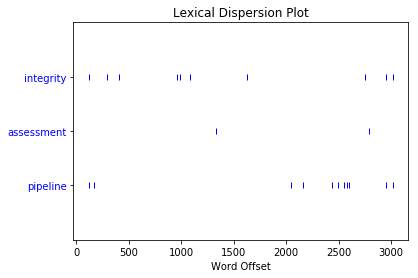

In [39]:
nltk2.dispersion_plot(['integrity', 'assessment', 'pipeline'])

In [41]:
len(nltk2) # Total number of tokens

3020

In [42]:
len(set(nltk2)) # Total number of unique words

858

In [43]:
len(set(nltk2))/len(nltk2)

0.28410596026490065

In [44]:
nltk2.count('integrity')

10

In [46]:
100*nltk2.count('pipeline')/len(nltk2) # This document has the work pipeline used a lot more than the word integrity

0.36423841059602646

In [54]:
tokenisedwords[2].lower()

'pipeline'

In [1]:
import PyPDF2
import pandas as pd 
import numpy as np 
import os
import glob

In [6]:
def readpdfpagetext(filepath,page):
    print("reading pdf as text file....")
    pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pdfReader.numPages
    #pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
    pdfpage = '' # empty string for the page
    pageobj = pdfReader.getPage(page)
    pdfpage = pdfpage + pageobj.extractText()
    '''for i in range(0,pdfReader.numPages): # iterating page by page to read text
        pageObj = pdfReader.getPage(i)          
        pdffile = pdffile + pageObj.extractText()'''
    print("file ready. file format: {}".format(type(pdfpage)))
    return pdfpage 

In [7]:
txt = readpdfpagetext("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\P&ID\\SBM Topsides P&IDs V1 Liza .pdf",3)

reading pdf as text file....
file ready. file format: <class 'str'>


In [8]:
import camelot

In [17]:
tables = camelot.read_pdf("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser\\P&ID\\SBM Topsides P&IDs V1 Liza .pdf", pages = '10')

In [19]:
tables[0].df

,0,1,2,3
0,OFFICIAL COPY - SO17013 - PEDWPRPF999009V1 - P...,,,
1,,CONTROL VALVE\nCONTROL VALVE\nCONTROL VALVE\nC...,NOTES,
2,,,1\nINSTRUMENT FUNCTION AVAILABLE IN VENDOR SY...,
3,,CONTROL VALVE WITH VENDOR SYSTEM SOLENOID\nCON...,,
4,,,LEGEND,
5,,,CLOUD INDICATING CHANGES FROM PREVIOUS REVISION,
6,,,Mng\nKja\nVra\nV1\n10-NOV-17 VALID FOR CONSTRU...,
7,,,Mng\nVra\nC3\n11-AUG-17 FOR COMMENTS ANDOR APP...,
8,,,Mng\nC2\n09-JUN-17\nFOR COMMENTS ANDOR APPROVA...,
9,,,Mng\nC1\n12-MAY-17 FOR COMMENTS ANDOR APPROVAL...,


In [25]:
n = txt.find("Title")
n

4011

In [28]:
txt[n+700:n+721]

'FPSOPIPING LEGENDP&ID'

In [26]:
txt[n:].find("A1")

721

In [24]:
n + 743 > 2098

True

In [22]:
Title = txt[n+700:n+743]

In [23]:
Title

'FPSOPIPING LEGENDP&IDA1N.T.S.SO17013PEDWPRP'

In [11]:
txt[6795:].find("VABL")

91

In [16]:
import re

In [17]:
# Create a Regex pattern to match the substring
regexPattern = re.compile("VABL")
 
# Iterate over all the matches of substring using iterator of matchObjects returnes by finditer()
iteratorOfMatchObs = regexPattern.finditer(txt)
indexPositions = []
count = 0
for matchObj in iteratorOfMatchObs:
   indexPositions.append(matchObj.start())
   count = count + 1

In [18]:
indexPositions

[6790, 6886, 6899, 6912, 6974, 6987, 7010, 7119, 7172, 7185, 7198, 7222]

In [46]:
txt[323:].find("FO")

624

In [57]:
txt[6790:6800]

'VABL-00788'

In [7]:
a = ['corrosion', 'system','pump']
def key_search(filespath):
    import pandas as pd
    import nltk
    from nltk.util import ngrams
    import collections
    import string
    from nltk.corpus import stopwords 
    import re
    import glob
    import os
    import PyPDF2
    import pandas as pd 
    import numpy as np
    from pathlib import Path
    #kwds = pd.DataFrame(columns = ["File", "Keywords"])
    
    def pdftext(filepath):
    
        pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pdfReader.numPages
        pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
        for i in range(0,pdfReader.numPages): # iterating page by page to read text
            pageObj = pdfReader.getPage(i)          
            pdffile = pdffile + pageObj.extractText()
        
        return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used


    def pdffiles(filespath):
        #pdffiles =  glob.glob(os.path.join(filespath, '*.pdf')) # identify the list of all pdf documents
        
        import os
        from fnmatch import fnmatch

        root = filespath
        pattern = "*REPT*.pdf"
        pdffiles = []
        for path, subdirs, files in os.walk(root):
            for name in files:
                if fnmatch(name, pattern):
                    pdffiles.append(os.path.join(path, name))
        
        data = {} # creating a dictionary which will have the file names as keys and content as value
        # Dictionaries are key:value pairs and the value can be accessed using the key 
        for file in pdffiles: 
            #if "REPT" in os.path.splitext(file)[0]:
            data.update({os.path.splitext(Path(file))[0]: pdftext(file)})
            
        return data
    
    d = pdffiles(filespath)
    
    from nltk.stem.porter import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer
    from nltk.tokenize import RegexpTokenizer
    import gc
    from sklearn.feature_extraction.text import CountVectorizer
    
    lem = WordNetLemmatizer()
    stem = PorterStemmer()
    
    stop_words = set(stopwords.words("english"))
    
    new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
    stop_words = stop_words.union(new_words)
    
    
    Docs = []
    
    for i in range(len(d.keys())):
        corpus = []
        if d[list(d.keys())[i]] != "":
            
            data = d[list(d.keys())[i]].translate(str.maketrans('', '', string.punctuation))
            data = data.replace("\n", " ")
            data = data.lower()

            #Remove punctuations
            text = re.sub('[^a-zA-Z]', ' ', data)

            #remove tags
            text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

            # remove special characters and digits
            text=re.sub("(\\d|\\W)+"," ",text)

            ##Convert to list from string
            text = text.split()

            ##Stemming
            ps=PorterStemmer()
            #Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in  
                    stop_words] 
            text = " ".join(text)
            
            for j in range(len(a)):
                if a[j].lower() in text:
                    if list(d.keys())[i] not in Docs:
                        Docs.append(list(d.keys())[i])
                        
    return list(dict.fromkeys(Docs))

In [8]:
d = key_search("C:\\Users\\vijay.shankar\\OneDrive - Xodus Group\\Projects\\2019\\DS\\File Reader and Parser")

In [19]:
a = ['KHI', 'K.H.I','Kinetic Hydrate Inhibitor']

In [20]:

def key_search2(filespath):
    import pandas as pd
    import nltk
    from nltk.util import ngrams
    import collections
    import string
    from nltk.corpus import stopwords 
    import re
    import glob
    import os
    import PyPDF2
    import pandas as pd 
    import numpy as np
    from pathlib import Path
    #kwds = pd.DataFrame(columns = ["File", "Keywords"])
    
    def pdftext(filepath):
    
        pdfFileObj = open(filepath,'rb')     #'rb' for read binary mode
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pdfReader.numPages
        pdffile = '' # This creates an empty string object to which the text from the pdf file will be added
        for i in range(0,pdfReader.numPages): # iterating page by page to read text
            pageObj = pdfReader.getPage(i)          
            pdffile = pdffile + pageObj.extractText()
        
        return pdffile # when the function is called, it returns text of the pdf file and assigns to the variable used


    def pdffiles(filespath):
        #pdffiles =  glob.glob(os.path.join(filespath, '*.pdf')) # identify the list of all pdf documents
        
        import os
        from fnmatch import fnmatch

        root = filespath
        pattern = "*REPT*.pdf"
        pdffiles = []
        for path, subdirs, files in os.walk(root):
            for name in files:
                if fnmatch(name, pattern):
                    pdffiles.append(os.path.join(path, name))
        
        data = {} # creating a dictionary which will have the file names as keys and content as value
        # Dictionaries are key:value pairs and the value can be accessed using the key 
        for file in pdffiles: 
            #if "REPT" in os.path.splitext(file)[0]:
            data.update({os.path.splitext(Path(file))[0]: pdftext(file)})
            
        return data
    
    d = pdffiles(filespath)
    
    from nltk.stem.porter import PorterStemmer
    from nltk.stem.wordnet import WordNetLemmatizer
    from nltk.tokenize import RegexpTokenizer
    import gc
    from sklearn.feature_extraction.text import CountVectorizer
    
    lem = WordNetLemmatizer()
    stem = PorterStemmer()
    
    stop_words = set(stopwords.words("english"))
    
    new_words = ["using", "show", "result", "large", "also", "iv", "one", "two", "new", "previously", "shown"]
    stop_words = stop_words.union(new_words)
    
    
    Docs = pd.DataFrame()
    
    for i in range(len(d.keys())):
        corpus = []
        if d[list(d.keys())[i]] != "":
            
            data = d[list(d.keys())[i]].translate(str.maketrans('', '', string.punctuation))
            data = data.replace("\n", " ")
            data = data.lower()

            #Remove punctuations
            text = re.sub('[^a-zA-Z]', ' ', data)

            #remove tags
            text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)

            # remove special characters and digits
            text=re.sub("(\\d|\\W)+"," ",text)

            ##Convert to list from string
            text = text.split()

            ##Stemming
            ps=PorterStemmer()
            #Lemmatisation
            lem = WordNetLemmatizer()
            text = [lem.lemmatize(word) for word in text if not word in  
                    stop_words] 
            text = " ".join(text)
            
            for j in range(len(a)):
                if a[j].lower() in text:
                    if list(d.keys())[i] not in Docs:
                        temp = {"Document" : list(d.keys())[i]}
                        for k in range(len(a)):
                            temp.update({a[k]:text.count(a[k].lower())})
            temp = pd.DataFrame.from_dict(temp,orient='index')
            Docs = pd.concat([Docs,temp], axis=1)
                        
    return Docs.transpose()

In [ ]:
d = key_search2("X:\\Assignments")

In [8]:
import pandas as pd

In [18]:
d

,Document,corrosion,system,pump
0,C:\Users\vijay.shankar\OneDrive - Xodus Group\...,1375,1684,1464
